# Predicting Credit Risk 

## In this notebook I will compare the accuracy of the machine learning algorithms in predicting the applicant\`s repayment abilities 

In [230]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [231]:
data = pd.read_csv(r"C:\Users\azerk\Desktop\Data\Credit_risk.csv")
data.head()

,ID_CLIENT,ID_SHOP,SEX,MARITAL_STATUS,AGE,QUANT_DEPENDANTS,EDUCATION,FLAG_RESIDENCIAL_PHONE,AREA_CODE_RESIDENCIAL_PHONE,PAYMENT_DAY,...,QUANT_BANKING_ACCOUNTS,PERSONAL_REFERENCE_#1,PERSONAL_REFERENCE_#2,FLAG_MOBILE_PHONE,FLAG_CONTACT_PHONE,PERSONAL_NET_INCOME,COD_APPLICATION_BOOTH,QUANT_ADDITIONAL_CARDS_IN_THE_APPLICATION,FLAG_CARD_INSURANCE_OPTION,TARGET_LABEL_BAD=1
0,2,15,F,S,18,0,NaN,Y,31,20,...,0,SARA,FELIPE,N,N,300.0,0,0,N,0
1,4,12,F,C,47,0,NaN,N,31,25,...,0,JACI,VALERIA ALEXANDRA TRAJANO,N,N,304.0,0,0,N,0
2,5,16,F,S,28,0,NaN,Y,31,25,...,0,MARCIA CRISTINA ZANELLA,SANDRO L P MARTINS,N,N,250.0,0,0,N,0
3,6,24,M,S,26,0,NaN,N,31,28,...,0,MARCIO,ANA,N,N,800.0,0,0,N,0
4,7,55,F,S,22,0,NaN,Y,31,12,...,0,FABIO (NOIVO),EDU (AVO),N,N,410.0,0,0,N,0


In [232]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 32 columns):
ID_CLIENT                                    40000 non-null int64
ID_SHOP                                      40000 non-null int64
SEX                                          39997 non-null object
MARITAL_STATUS                               40000 non-null object
AGE                                          40000 non-null int64
QUANT_DEPENDANTS                             40000 non-null int64
EDUCATION                                    0 non-null float64
FLAG_RESIDENCIAL_PHONE                       40000 non-null object
AREA_CODE_RESIDENCIAL_PHONE                  40000 non-null int64
PAYMENT_DAY                                  40000 non-null int64
SHOP_RANK                                    40000 non-null int64
RESIDENCE_TYPE                               40000 non-null object
MONTHS_IN_RESIDENCE                          40000 non-null int64
FLAG_MOTHERS_NAME              

## Since the Education column has no values, I will drop it. The Personal Reference columns also do not contain any significant information, since this information is very unique. So I drop it too

In [233]:
data.drop(columns=["EDUCATION", "ID_CLIENT", "PERSONAL_REFERENCE_#1", "PERSONAL_REFERENCE_#2"], inplace=True)

In [234]:
data.nunique()

ID_SHOP                                        31
SEX                                             2
MARITAL_STATUS                                  5
AGE                                            72
QUANT_DEPENDANTS                                1
FLAG_RESIDENCIAL_PHONE                          2
AREA_CODE_RESIDENCIAL_PHONE                    59
PAYMENT_DAY                                    16
SHOP_RANK                                       3
RESIDENCE_TYPE                                  4
MONTHS_IN_RESIDENCE                            76
FLAG_MOTHERS_NAME                               2
FLAG_FATHERS_NAME                               2
FLAG_RESIDENCE_TOWN=WORKING_TOWN                2
FLAG_RESIDENCE_STATE=WORKING_STATE              2
MONTHS_IN_THE_JOB                              54
PROFESSION_CODE                               291
MATE_INCOME                                   561
FLAG_RESIDENCIAL_ADDRESS=POSTAL_ADDRESS         2
FLAG_OTHER_CARD                                 1


In [235]:
# Capitalizing only the first letter of the feature names
data.columns = data.columns.str.capitalize()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 28 columns):
Id_shop                                      40000 non-null int64
Sex                                          39997 non-null object
Marital_status                               40000 non-null object
Age                                          40000 non-null int64
Quant_dependants                             40000 non-null int64
Flag_residencial_phone                       40000 non-null object
Area_code_residencial_phone                  40000 non-null int64
Payment_day                                  40000 non-null int64
Shop_rank                                    40000 non-null int64
Residence_type                               40000 non-null object
Months_in_residence                          40000 non-null int64
Flag_mothers_name                            40000 non-null object
Flag_fathers_name                            40000 non-null object
Flag_residence_town=working

In [236]:
data.columns

Index(['Id_shop', 'Sex', 'Marital_status', 'Age', 'Quant_dependants',
       'Flag_residencial_phone', 'Area_code_residencial_phone', 'Payment_day',
       'Shop_rank', 'Residence_type', 'Months_in_residence',
       'Flag_mothers_name', 'Flag_fathers_name',
       'Flag_residence_town=working_town',
       'Flag_residence_state=working_state', 'Months_in_the_job',
       'Profession_code', 'Mate_income',
       'Flag_residencial_address=postal_address', 'Flag_other_card',
       'Quant_banking_accounts', 'Flag_mobile_phone', 'Flag_contact_phone',
       'Personal_net_income', 'Cod_application_booth',
       'Quant_additional_cards_in_the_application',
       'Flag_card_insurance_option', 'Target_label_bad=1'],
      dtype='object')

In [237]:
data.Quant_dependants.value_counts(normalize=True)

0    1.0
Name: Quant_dependants, dtype: float64

### It seems like we have columns with 0 variance. We need to drop them too

In [238]:
# Displaying the columns which has a 0-like variance
for i in data.columns:
    if data[i].value_counts(normalize=True).max() > 0.95:
        print(str(data[i].value_counts(normalize=True).max()) + " " + i)

1.0 Quant_dependants
0.99425 Shop_rank
0.99625 Flag_mothers_name
0.95855 Flag_fathers_name
0.991325 Flag_residence_state=working_state
0.960275 Mate_income
0.97895 Flag_residencial_address=postal_address
1.0 Flag_other_card
1.0 Quant_banking_accounts
1.0 Flag_mobile_phone
1.0 Flag_contact_phone
1.0 Cod_application_booth
1.0 Flag_card_insurance_option


### I decided to drop these columns to make the model less complex

In [239]:
for i in data.columns:
    if data[i].value_counts(normalize=True).max() > 0.95:
        data.drop(columns=[i],inplace=True)

In [240]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 15 columns):
Id_shop                                      40000 non-null int64
Sex                                          39997 non-null object
Marital_status                               40000 non-null object
Age                                          40000 non-null int64
Flag_residencial_phone                       40000 non-null object
Area_code_residencial_phone                  40000 non-null int64
Payment_day                                  40000 non-null int64
Residence_type                               40000 non-null object
Months_in_residence                          40000 non-null int64
Flag_residence_town=working_town             40000 non-null object
Months_in_the_job                            40000 non-null int64
Profession_code                              40000 non-null int64
Personal_net_income                          40000 non-null float64
Quant_additional_cards_in_

## Some features have too long names. Renaming will do well

In [241]:
data.rename(columns={"Target_label_bad=1": "Label_bad", "Area_code_residencial_phone": "Area_code", "Flag_residence_town=working_town":"Working_town", "Quant_additional_cards_in_the_application": "Additional_cards"}, inplace=True)

In [242]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 15 columns):
Id_shop                   40000 non-null int64
Sex                       39997 non-null object
Marital_status            40000 non-null object
Age                       40000 non-null int64
Flag_residencial_phone    40000 non-null object
Area_code                 40000 non-null int64
Payment_day               40000 non-null int64
Residence_type            40000 non-null object
Months_in_residence       40000 non-null int64
Working_town              40000 non-null object
Months_in_the_job         40000 non-null int64
Profession_code           40000 non-null int64
Personal_net_income       40000 non-null float64
Additional_cards          40000 non-null int64
Label_bad                 40000 non-null int64
dtypes: float64(1), int64(9), object(5)
memory usage: 4.6+ MB


### Sex column has 3 missing values. I could use KNN to predict these missing values, but I decided to drop them, since 3 missing values out of 40000 values will not harm us

In [243]:
data.dropna(inplace=True)
data.reset_index(drop=True, inplace=True)

### Some features may have too many categories. I decided to decrease the number of categories in such variables

In [244]:
data.Area_code.value_counts(normalize=True)

31    0.702003
50    0.222092
5     0.048779
23    0.019826
24    0.002250
49    0.000925
32    0.000650
27    0.000500
42    0.000300
38    0.000250
52    0.000225
56    0.000200
68    0.000150
11    0.000150
43    0.000100
33    0.000100
8     0.000075
26    0.000075
2     0.000075
67    0.000050
1     0.000050
69    0.000050
7     0.000050
37    0.000050
41    0.000050
34    0.000050
6     0.000050
12    0.000050
57    0.000050
48    0.000050
44    0.000025
21    0.000025
64    0.000025
62    0.000025
30    0.000025
65    0.000025
60    0.000025
59    0.000025
3     0.000025
35    0.000025
4     0.000025
36    0.000025
25    0.000025
22    0.000025
51    0.000025
13    0.000025
19    0.000025
17    0.000025
70    0.000025
39    0.000025
47    0.000025
40    0.000025
9     0.000025
15    0.000025
10    0.000025
46    0.000025
14    0.000025
45    0.000025
63    0.000025
Name: Area_code, dtype: float64

In [245]:
# All the categories except 31 and 50 will be labeled as "Other"
data.loc[~data.Area_code.isin(["31", "50"]), "Area_code"] = "Other"

In [246]:
data.Area_code.value_counts(normalize=True)

31       0.702003
50       0.222092
Other    0.075906
Name: Area_code, dtype: float64

In [247]:
data.Additional_cards.value_counts()

0    34777
1     4487
2      730
3        3
Name: Additional_cards, dtype: int64

In [248]:
for col in ['Area_code', 'Sex', 'Marital_status', 'Residence_type', 'Flag_residencial_phone', 'Working_town', 'Additional_cards']:
    data[col] = data[col].astype('category')

In [249]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39997 entries, 0 to 39996
Data columns (total 15 columns):
Id_shop                   39997 non-null int64
Sex                       39997 non-null category
Marital_status            39997 non-null category
Age                       39997 non-null int64
Flag_residencial_phone    39997 non-null category
Area_code                 39997 non-null category
Payment_day               39997 non-null int64
Residence_type            39997 non-null category
Months_in_residence       39997 non-null int64
Working_town              39997 non-null category
Months_in_the_job         39997 non-null int64
Profession_code           39997 non-null int64
Personal_net_income       39997 non-null float64
Additional_cards          39997 non-null category
Label_bad                 39997 non-null int64
dtypes: category(7), float64(1), int64(7)
memory usage: 2.7 MB


In [250]:
data.Profession_code.unique()

array([853,  35,  24, 999,  40, 950,  13, 165,  15,  26, 703, 135, 704,
        79,  38,  34,  39,  72, 801,  30, 713, 305, 653, 261,  43, 205,
       918, 251, 720,  62,  53,  41,   2, 131, 992, 514,   1, 132, 501,
        61, 158, 263,  60,  70, 855, 110, 213, 807, 717, 656, 712, 865,
        46, 707,  63, 863, 100, 118, 806, 125, 265, 117, 654, 266, 953,
       167, 254, 706, 905, 222, 202, 123, 702, 302, 166, 522, 210, 253,
        18, 139, 113, 804, 920, 301, 725,  49,   4, 218,  89, 515, 255,
        29, 108,  19, 134, 521, 508, 130,  65, 915, 732,  17, 262, 711,
        31, 155, 864, 721, 133, 163, 952,  25, 505, 105, 310, 153, 922,
       151,  66, 718,  36,   8, 312, 137,  52,  99, 525, 107, 223, 159,
        12,  32, 129,  64, 650, 264, 657, 250, 731, 512,  44, 453, 203,
        77, 991, 908,  69, 164, 140, 652,  68,  78, 527, 923, 513, 307,
       503,  51, 350, 912, 954, 504, 211, 655, 524, 921, 401, 136,  55,
       911, 916, 116,  48, 351,  42,  88, 219, 220, 904, 127, 11

### We have too many categories. I decided to keep top N categories which in total have over 50% of total observations, so I don't mind to sacrifice some information value

In [251]:
data.Profession_code.value_counts(normalize=True).head(11).sum()

0.5044878365877441

In [252]:
data.Profession_code.value_counts(normalize=True).head(11)

999    0.127110
950    0.093407
13     0.050054
205    0.044653
703    0.038678
26     0.037953
131    0.026127
514    0.024902
60     0.023977
40     0.019351
38     0.018276
Name: Profession_code, dtype: float64

In [253]:
data.loc[~data.Profession_code.isin(["999", "950","13","205","703","26","131","514","60","40","38"]), "Profession_code"] = "Other_profession"

## Same story with Profession_code and Id_shop columns

In [254]:
data.Profession_code.value_counts(normalize=True)

Other_profession    0.495512
999                 0.127110
950                 0.093407
13                  0.050054
205                 0.044653
703                 0.038678
26                  0.037953
131                 0.026127
514                 0.024902
60                  0.023977
40                  0.019351
38                  0.018276
Name: Profession_code, dtype: float64

In [255]:
data.Id_shop.value_counts(normalize=True).head(6).sum()

0.5091631872390429

In [256]:
data.Id_shop.value_counts(normalize=True).head(6)

25    0.133885
22    0.097832
24    0.087557
55    0.085231
23    0.059379
20    0.045278
Name: Id_shop, dtype: float64

In [257]:
data.loc[~data.Id_shop.isin(["25","22","24","55","23","20"]), "Id_shop"] = "Other_shop"

In [258]:
data.Id_shop.value_counts(normalize=True)

Other_shop    0.490837
25            0.133885
22            0.097832
24            0.087557
55            0.085231
23            0.059379
20            0.045278
Name: Id_shop, dtype: float64

### I decided to divide the Payment day into 3 different groups: 1-10; 11-20; 21-31

In [259]:
data.Payment_day.value_counts(normalize=True)

12    0.253769
8     0.180164
18    0.165937
20    0.126234
28    0.090107
25    0.067630
3     0.039053
23    0.028927
1     0.027277
16    0.005325
11    0.005325
22    0.003175
6     0.003100
9     0.002600
27    0.001350
15    0.000025
Name: Payment_day, dtype: float64

In [260]:
data.Payment_day=pd.cut(data.Payment_day, [0,10,20,31])

In [261]:
data.Payment_day.value_counts()

(10, 20]    22263
(0, 10]     10087
(20, 31]     7647
Name: Payment_day, dtype: int64

In [262]:
for col in ['Profession_code','Id_shop', 'Payment_day']:
    data[col] = data[col].astype('category')

In [263]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39997 entries, 0 to 39996
Data columns (total 15 columns):
Id_shop                   39997 non-null category
Sex                       39997 non-null category
Marital_status            39997 non-null category
Age                       39997 non-null int64
Flag_residencial_phone    39997 non-null category
Area_code                 39997 non-null category
Payment_day               39997 non-null category
Residence_type            39997 non-null category
Months_in_residence       39997 non-null int64
Working_town              39997 non-null category
Months_in_the_job         39997 non-null int64
Profession_code           39997 non-null category
Personal_net_income       39997 non-null float64
Additional_cards          39997 non-null category
Label_bad                 39997 non-null int64
dtypes: category(10), float64(1), int64(4)
memory usage: 1.9 MB


In [264]:
data.head()

,Id_shop,Sex,Marital_status,Age,Flag_residencial_phone,Area_code,Payment_day,Residence_type,Months_in_residence,Working_town,Months_in_the_job,Profession_code,Personal_net_income,Additional_cards,Label_bad
0,Other_shop,F,S,18,Y,31,"(10, 20]",P,216,Y,12,Other_profession,300.0,0,0
1,Other_shop,F,C,47,N,31,"(20, 31]",P,180,N,24,Other_profession,304.0,0,0
2,Other_shop,F,S,28,Y,31,"(20, 31]",O,12,Y,12,Other_profession,250.0,0,0
3,24,M,S,26,N,31,"(20, 31]",P,180,N,0,999,800.0,0,0
4,55,F,S,22,Y,31,"(10, 20]",A,0,Y,48,999,410.0,0,0


## Exploratory Data Analysis

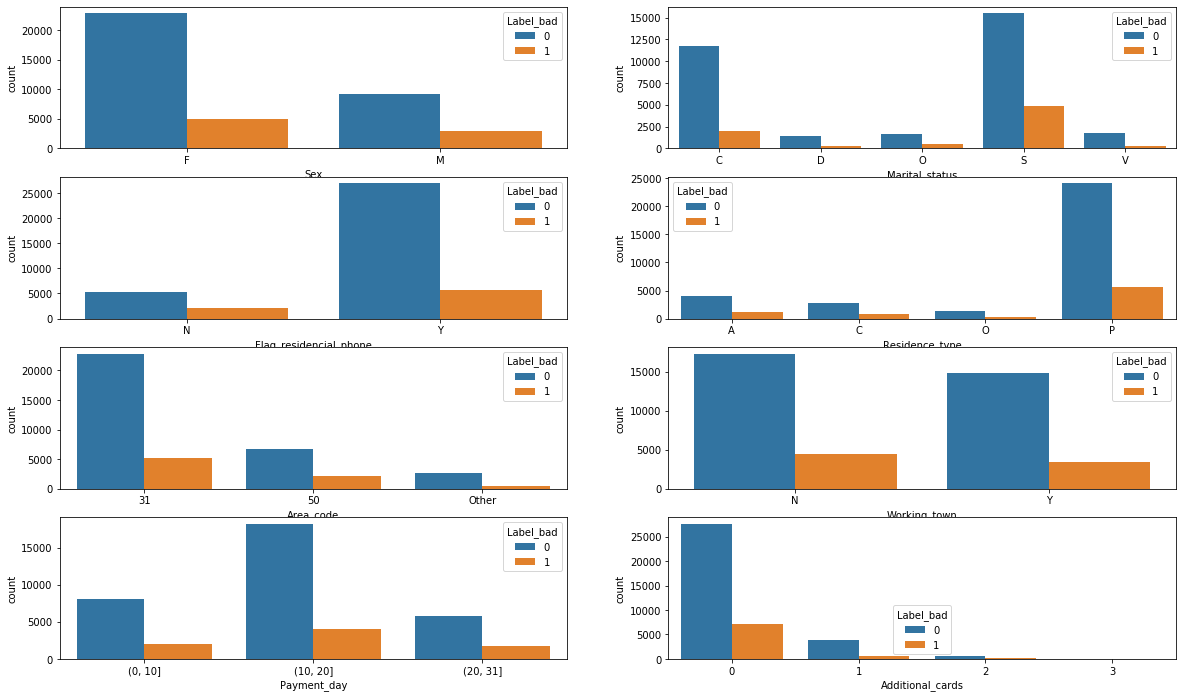

In [265]:
fig, axarr = plt.subplots(4, 2, figsize=(20, 12))
sns.countplot(x='Sex', hue = 'Label_bad',data = data, ax=axarr[0][0])
sns.countplot(x='Marital_status', hue = 'Label_bad',data = data, ax=axarr[0][1])
sns.countplot(x='Flag_residencial_phone', hue = 'Label_bad',data = data, ax=axarr[1][0])
sns.countplot(x='Residence_type', hue = 'Label_bad',data = data, ax=axarr[1][1])
sns.countplot(x='Area_code', hue = 'Label_bad',data = data, ax=axarr[2][0])
sns.countplot(x='Working_town', hue = 'Label_bad',data = data, ax=axarr[2][1])
sns.countplot(x='Payment_day', hue = 'Label_bad',data = data, ax=axarr[3][0])
sns.countplot(x='Additional_cards', hue = 'Label_bad',data = data, ax=axarr[3][1])

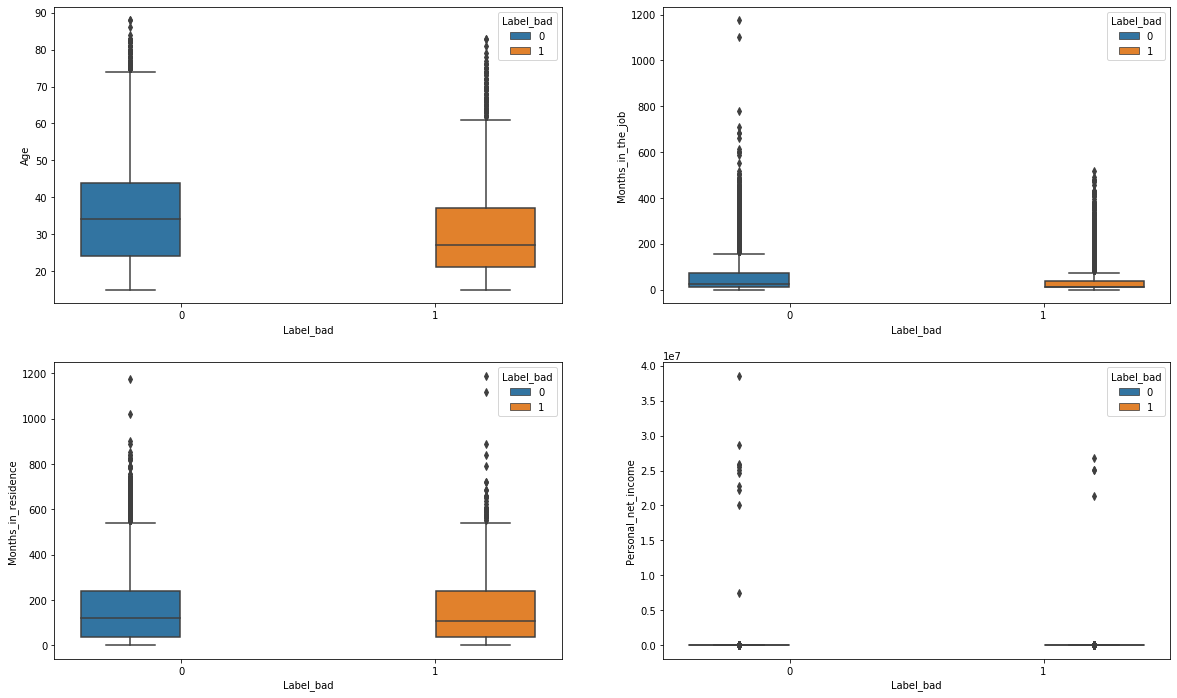

In [266]:
fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
sns.boxplot(y='Age',x ='Label_bad', hue ='Label_bad',data = data, ax=axarr[0][0])
sns.boxplot(y='Months_in_the_job',x ='Label_bad', hue ='Label_bad',data = data , ax=axarr[0][1])
sns.boxplot(y='Months_in_residence',x ='Label_bad', hue ='Label_bad',data = data, ax=axarr[1][0])
sns.boxplot(y='Personal_net_income',x ='Label_bad', hue ='Label_bad',data = data, ax=axarr[1][1])

### It seems like age is a significant predictor of the credit risk. Younger applicants have higher risk of default.
### Gender of the applicant also plays a role

In [267]:
# Dummy encoding of the categorical features
data = pd.get_dummies(data, columns = ["Id_shop", "Sex", "Marital_status", "Flag_residencial_phone", "Area_code", "Payment_day", "Residence_type", "Working_town", "Profession_code" ], drop_first=True, dtype="int64")

In [268]:
data.Additional_cards.value_counts()

0    34777
1     4487
2      730
3        3
Name: Additional_cards, dtype: int64

In [269]:
from sklearn.preprocessing import LabelEncoder
data.Additional_cards = LabelEncoder().fit_transform(data.Additional_cards)


In [270]:
data.Label_bad.value_counts()

0    32098
1     7899
Name: Label_bad, dtype: int64

## Our target variable is not distributed properly. There is an imbalance. We need to undersample the dataset

In [271]:
bad  = data[data['Label_bad'] == 1]
good  = data[data['Label_bad'] == 0]

In [272]:
!pip install imblearn

In [273]:
from imblearn.under_sampling import NearMiss

In [274]:
X = data.drop('Label_bad', axis=1)
y = data.Label_bad
nm = NearMiss()
X_res, y_res = nm.fit_sample(X,y)

## Now our dataset is well-balanced

In [275]:
X_res.shape, y_res.shape # res means resampled

((15798, 36), (15798,))

# Modeling

In [276]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.25, random_state=2)

In [277]:
# I decided to standardize the coefficients

from sklearn.preprocessing import StandardScaler

y_train = y_train.values.reshape(-1,1)
y_test = y_test.values.reshape(-1,1)

scaler = StandardScaler() 

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [278]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
print('DecisionTreeClassifier`s accuracy score is',round(metrics.accuracy_score(y_test, y_pred),5))

DecisionTreeClassifier`s accuracy score is 0.67063


In [279]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Logistic regression`s accuracy score is',round(metrics.accuracy_score(y_test, y_pred),5))

Logistic regression`s accuracy score is 0.68911


C:\Users\azerk\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [280]:
logreg.score(X_train,y_train)  # Checking the overfitting

0.6768230925050641

In [281]:
conf = (metrics.confusion_matrix(y_test, y_pred))
FP = conf[1][0]
FN = conf[0][1]
TP = conf[0][0]
TN = conf[1][1]
print('False Positive:',FP)
print('False Negative:',FN)
print('True Positive:',TP)
print('True Negative:',TN)
print('------------------')
print('PPV is', round(TP/(TP+FP),3))
print('NPV is', round(TN/(TN+FN),3))
print('Sensitivity is', round(TP/(TP+FN),3))
print('Specificity is', round(TN/(TN+FP),3))


False Positive: 875
False Negative: 353
True Positive: 1576
True Negative: 1146
------------------
PPV is 0.643
NPV is 0.765
Sensitivity is 0.817
Specificity is 0.567


#### Before resampling the dataset, the accuracy was higher, however the model had a huge bias: the number of false negatives was very high. I am satisfied with these results, despite lower accuracy

In [282]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=120, criterion='entropy')
rfc.fit(X_train, y_train)
rfc_pred_test = rfc.predict(X_test)
print('Accuracy score of the Random forest Classifier:',round(metrics.accuracy_score(y_test, rfc_pred_test),5))

C:\Users\azerk\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Accuracy score of the Random forest Classifier: 0.68481


In [283]:
rfc_scores = cross_val_score(rfc, X_res, y_res, cv=20, scoring='accuracy')
print('Accuracy of each partition:\n',rfc_scores)
print('Mean score is',round(rfc_scores.mean(),5)) 

Accuracy of each partition:
 [0.65063291 0.74556962 0.73924051 0.7443038  0.75696203 0.72911392
 0.74683544 0.74556962 0.74303797 0.72025316 0.7164557  0.66708861
 0.66075949 0.69367089 0.64556962 0.67468354 0.60886076 0.63037975
 0.63751584 0.5982256 ]
Mean score is 0.69274


In [284]:
conf = (metrics.confusion_matrix(y_test, rfc_pred_test))
FP = conf[1][0]
FN = conf[0][1]
TP = conf[0][0]
TN = conf[1][1]
print('False Positive:',FP)
print('False Negative:',FN)
print('True Positive:',TP)
print('True Negative:',TN)
print('------------------')
print('PPV is', round(TP/(TP+FP),3))
print('NPV is', round(TN/(TN+FN),3))
print('Sensitivity is', round(TP/(TP+FN),3))
print('Specificity is', round(TN/(TN+FP),3))

False Positive: 628
False Negative: 617
True Positive: 1312
True Negative: 1393
------------------
PPV is 0.676
NPV is 0.693
Sensitivity is 0.68
Specificity is 0.689


## I decided to check the accuracy of the ensemble models too

In [285]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [286]:
lr = LogisticRegression()
dt = DecisionTreeClassifier()
svm = SVC(kernel='poly', degree=2)
knn = KNeighborsClassifier(n_neighbors = 3)
gnb = GaussianNB()

In [287]:
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print('KNN score`s accuracy is',round(metrics.accuracy_score(y_test, y_pred),5))

C:\Users\azerk\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


KNN score`s accuracy is 0.58329


In [288]:
knn_scores = cross_val_score(knn, X_res, y_res, cv=10, scoring='accuracy')
print('Accuracy of each partition:\n',knn_scores)
print('Mean score is',round(knn_scores.mean(),5)) 

Accuracy of each partition:
 [0.36772152 0.55       0.57468354 0.56392405 0.57468354 0.6056962
 0.60822785 0.61202532 0.59784674 0.56934769]
Mean score is 0.56242


In [289]:
bag = BaggingClassifier(knn, max_samples=5,max_features=2,n_jobs=2,oob_score=True)

In [290]:
bag.fit(X_train,y_train)

C:\Users\azerk\Anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:645: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BaggingClassifier(base_estimator=KNeighborsClassifier(algorithm='auto',
                                                      leaf_size=30,
                                                      metric='minkowski',
                                                      metric_params=None,
                                                      n_jobs=None,
                                                      n_neighbors=3, p=2,
                                                      weights='uniform'),
                  bootstrap=True, bootstrap_features=False, max_features=2,
                  max_samples=5, n_estimators=10, n_jobs=2, oob_score=True,
                  random_state=None, verbose=0, warm_start=False)

In [291]:
bag.oob_score_

0.5944463200540175

In [292]:
y_pred = bag.predict(X_test)
print('Bagging accuracy score is',round(metrics.accuracy_score(y_test, y_pred),5))

Bagging accuracy score is 0.49468


In [293]:
ada = AdaBoostClassifier(base_estimator=None, n_estimators=100)
ada.fit(X_train, y_train)
y_pred = ada.predict(X_test)
print('AdaBoost`s accuracy score is',round(metrics.accuracy_score(y_test, y_pred),5))

C:\Users\azerk\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoost`s accuracy score is 0.6843


In [294]:
gtb = GradientBoostingClassifier(n_estimators=10)
gtb.fit(X_train,y_train)
y_pred = gtb.predict(X_test)
print('GradientTreeBoosting`s accuracy score is',round(metrics.accuracy_score(y_test, y_pred),5))

C:\Users\azerk\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientTreeBoosting`s accuracy score is 0.68101


In [295]:
evc = VotingClassifier(estimators= [('lr', lr), ('gnb', gnb), ('rfc', rfc)], voting='hard')
evc.fit(X_train,y_train)
y_pred = evc.predict(X_test)
print('VotingClassifier`s accuracy score =',round(metrics.accuracy_score(y_test, y_pred),5))

C:\Users\azerk\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\azerk\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


VotingClassifier`s accuracy score = 0.67165


## After comparing the accuracy of different algorithms, we can conclude that in the best case scenario our model can correctly predict the credit score of 7 applicants out of 10. I believe that there is a large room for improvement